<a href="https://colab.research.google.com/github/ersilia-os/event-fund-ai-drug-discovery/blob/main/notebooks/session2_breakout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMV Malaria Dataset
We will use the list of 400 compounds from the MMV Malaria Box for this exercise. The list of molecules is already prepared in the /data folder of the google drive DataScience_Workshop we created during Session 1
First, we will mount Google Drive on the notebook to access the data.

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

#import necessary packages
import matplotlib.pyplot as plt
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#do not run this if you already did during Session 1
!mkdir /content/drive/MyDrive/DataScience_Workshop
!git clone https://github.com/ersilia-os/event-fund-ai-drug-discovery.git /content/drive/MyDrive/DataScience_Workshop

Cloning into '/content/drive/MyDrive/DataScience_Workshop'...
remote: Enumerating objects: 143, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (112/112), done.
remote: Total 143 (delta 64), reused 82 (delta 27), pack-reused 0
Receiving objects: 100% (143/143), 1.85 MiB | 7.45 MiB/s, done.
Resolving deltas: 100% (64/64), done.


In [ ]:
#we can open it as a pandas dataframe
smiles = "drive/MyDrive/DataScience_Workshop/data/day2/mmv_malariabox.csv"
df=pd.read_csv(smiles)
df.head()

,CAN_SMILES
0,COc1ccccc1CNC(=O)CCn1c(=O)[nH]c2ccsc2c1=O
1,CN(C)c1ccc(C(O)(c2ccc(N(C)C)cc2)c2ccc(N(C)C)cc...
2,Cc1ccc(-c2cc3c(SCC(=O)Nc4cc(C(F)(F)F)ccc4Cl)nc...
3,CCOC(=O)C1=C(c2ccccc2)N=c2sc(=Cc3cc(C)n(-c4ccc...
4,CCOC(=O)c1cnc2c(C)cc(C)cc2c1Nc1ccc(OC)c(OC)c1


# Ersilia Model Hub
The Ersilia Model Hub is a repository of pre-trained, ready-to-use AI models for drug discovery. A list of models and its applications is available [here](https://ersilia.io/model-hub).

You can run the Ersilia Model Hub in your computer by installing the [Ersilia Python Package](https://github.com/ersilia-os/ersilia). In this session, we will use the Google Colab implementation of the Ersilia Model Hub to ensure compatibility with all systems.

In [ ]:
#@title The Ersilia Model Hub
#@markdown Click on the play button to install Ersilia in this Colab notebook.

%%capture
%env MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
%env MINICONDA_PREFIX=/usr/local
%env PYTHONPATH={PYTHONPATH}:/usr/local/lib/python3.7/site-packages
%env CONDA_PREFIX=/usr/local
%env CONDA_PREFIX_1=/usr/local
%env CONDA_DIR=/usr/local
%env CONDA_DEFAULT_ENV=base
!wget https://repo.anaconda.com/miniconda/$MINICONDA_INSTALLER_SCRIPT
!chmod +x $MINICONDA_INSTALLER_SCRIPT
!./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX
!python -m pip install git+https://github.com/ersilia-os/ersilia.git
!python -m pip install requests --upgrade
import sys
_ = (sys.path.append("/usr/local/lib/python3.7/site-packages"))

# Example Model Prediction
We will use one model as a step-by-step guide of how to use the Ersilia Model Hub and analyse the results. Each Ersilia model is identified by a code (eosxxxx) and a slug (one - two word identifier). We will always refer to the models by either the code or the slug. More details are available in the Ersilia Model Hub [documentation](https://ersilia.gitbook.io/ersilia-book/).



## Antimalarial Activity
The Ersilia Model Hub contains a surrogate version of MAIP, a web-based model for predicting blood-stage malaria inhibitors, published in [Bosc et al, 2021](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-021-00487-2).

### Steps
1. Fetch the model from the online repositor using a bash command (!) 
2. Import the ersilia package as a Python function
3. Load the selected model, "eos2gth"
4. Run predictions for the input of interest (the MMV Malaria Box smiles list). The output will be loaded in a Pandas dataframe
5. Close the model

In [ ]:
!ersilia fetch eos2gth

⬇️  Fetching model eos2gth: maip-malaria-surrogate
👍 Model eos2gth fetched successfully!


In [ ]:
from ersilia import ErsiliaModel

model = ErsiliaModel("eos2gth")
model.serve()
output = model.predict(input=smiles, output="pandas")
model.close()

In [ ]:
#once the model has run the predictions, let's save the output in our Google Drive
output.to_csv("drive/MyDrive/DataScience_Workshop/data/day2/eos2gth.csv", index=False)

### Analyising the model output

In [ ]:
#First, let's load the predictions we just stored in drive

maip = pd.read_csv("drive/MyDrive/DataScience_Workshop/data/day2/eos2gth.csv")
maip.head()

,key,input,score
0,ALGPHOUNWIZIOQ-UHFFFAOYSA-N,COc1ccccc1CNC(=O)CCn1c(=O)[nH]c2ccsc2c1=O,6.886159
1,QFVDKARCPMTZCS-UHFFFAOYSA-N,CN(C)c1ccc(C(O)(c2ccc(N(C)C)cc2)c2ccc(N(C)C)cc...,15.483176
2,HKNNPGWJKJDXCN-UHFFFAOYSA-N,Cc1ccc(-c2cc3c(SCC(=O)Nc4cc(C(F)(F)F)ccc4Cl)nc...,27.288107
3,QQNUVMRXVVLAAU-UHFFFAOYSA-N,CCOC(=O)C1=C(c2ccccc2)N=c2sc(=Cc3cc(C)n(-c4ccc...,12.532308
4,MSGARPVVCYTSLR-UHFFFAOYSA-N,CCOC(=O)c1cnc2c(C)cc(C)cc2c1Nc1ccc(OC)c(OC)c1,37.554440


We observe three columns:

*   key: InChiKey representation of the molecules
*   input: SMILES
*   score: model prediction

We can read more about the output of the model in its associated [documentation](https://chembl.gitbook.io/malaria-project/output-file). As we can see, the output is a score, and "The higher the score is the more likely the compound is predicted to be active. Because there is no normalised score, the user defines a selection threshold."



In [ ]:
#we can sort the molecules based on its score
output.sort_values("score", ascending=False).head()

,key,input,score
136,HPFVQAYLQOSFOL-UHFFFAOYSA-N,COc1cccc(Nc2nc(NCCO)c3ccccc3n2)c1,77.199020
399,ZGMMVVYGDFQTBB-UHFFFAOYSA-N,OCCNc1nc(Nc2ccc(Cl)c(Cl)c2)nc2ccccc12,76.798370
69,RHZLKBRFIAZMTN-UHFFFAOYSA-N,Cc1ccc(Nc2nc(NCCO)c3ccccc3n2)cc1C,76.052498
339,NPWXHTXMBIOHKI-UHFFFAOYSA-N,Cn1c(=O)n(C)c2cc(CNCCNc3ccnc4cc(Cl)ccc34)ccc21,76.012589
55,YZZGEZJZTYYZGG-UHFFFAOYSA-N,CCN(CC)CCNc1ncnc2c1[nH]c1ccc(Cl)cc12,71.951157


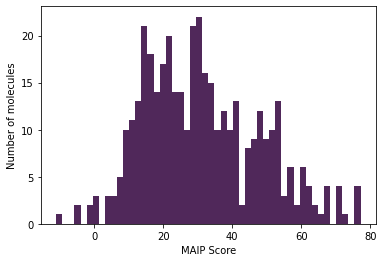

In [ ]:
#we can plot the distribution of the scores

plt.hist(output["score"], bins=50, color="#50285a")
plt.xlabel("MAIP Score")
plt.ylabel("Number of molecules")
plt.show()

# Breakout session
Here is a list of models that can be used for this exercise. Please refer to the [Ersilia Model Hub](https://www.ersilia.io/model-hub) to read more about each one of them, the source of data they use and how can them be applied to our problem.

*   Malaria Activity: eos2gth / maip-malaria-surrogate
*   Tuberculosis Activity: eos46ev / chemtb
*   Antibiotic Activity: eos4e40 / chemprop-antibiotic
*   Cardiotoxicity (hERG): eos43at / molgrad-herg
*   Retrosynthetic Accessibility: eos2r5a / retrosynthetic-accessibility
*   Aqueous Solubility: eos6oli / soltrannet-aqueous-solubility
*   Natural Product Likeness: eos9yui / natural-product-likeness

In [ ]:
!ersilia fetch eos46ev
!ersilia fetch eos4e40
!ersilia fetch eos43at
!ersilia fetch eos2r5a
!ersilia fetch eos6oli
!ersilia fetch eos9yui

⬇️  Fetching model eos46ev: chemtb
👍 Model eos46ev fetched successfully!
⬇️  Fetching model eos4e40: chemprop-antibiotic
👍 Model eos4e40 fetched successfully!
⬇️  Fetching model eos43at: molgrad-herg
👍 Model eos43at fetched successfully!
⬇️  Fetching model eos2r5a: retrosynthetic-accessibility
👍 Model eos2r5a fetched successfully!
⬇️  Fetching model eos6oli: soltrannet-aqueous-solubility
👍 Model eos6oli fetched successfully!
⬇️  Fetching model eos9yui: natural-product-likeness
👍 Model eos9yui fetched successfully!
